# Nash Q learning basic implementation

In [1]:
import numpy as np
import nashpy as nash

In [2]:
Q = 4 #Number of games
N = 2 #Number of players
A = 2 #Number of actions per player

In [3]:
# Player1 action / Player2 action / starting state / ending state / probability
#Player 1 - column player - 0: .3, 1: .4
#Player 2 - row player - 0: .1, 1: .2
TRANSITION_MATRIX = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0 - .1 .3
            [
                
                [0, 0.5, 0, 0.5],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1 .2 .3
            [
                
                [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0 .1 .4
            [
                
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1 .2 .4
            [
                
                [0, 0.5, 0, 0.5],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ]
    ]
)

In [4]:
TRANSITION_MATRIX[0, 1, 2, 3]

1.0

In [5]:
# state / player1 action / player2 action / [player1 reward, player2 reward]
PAYOFF_MATRIX = np.array([
    # State 0
    [
        [ [2, 1], [0, 0] ],
        [ [0, 0], [1, 2] ]
    ],
    # State 1
    [
        [ [1, 1], [3, 0] ],
        [ [0, 3], [2, 2] ]
    ],
    # State 
    [
        [ [2, 0], [0, 2] ],
        [ [0, 1], [1, 0] ]
    ],
    # State 33
    [
        [ [1, 1], [0, 0] ],
        [ [0, 0], [2, 2] ]
    ],
])

In [6]:
PAYOFF_MATRIX[0, :, :, 0]

array([[2, 0],
       [0, 1]])

In [7]:
def transition_probability(state, player1_action, player2_action, next):
    return TRANSITION_MATRIX[player1_action, player2_action, state, next]

In [8]:
def reward(state, player1_action, player2_action):
    return PAYOFF_MATRIX[state, player1_action, player2_action]

In [9]:
n_games = 10000
state = 0
totalReward = np.array([0, 0])
randomRewards = []
for _ in range(n_games):
    print("State:", state)
    player1_action = np.random.choice(A, p=[0.5, 0.5])
    player2_action = np.random.choice(A, p=[0.5, 0.5])
    print("Player 1 action:", player1_action)
    print("Player 2 action:", player2_action)
    next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
    print("Next state:", next_state)
    r = reward(state, player1_action, player2_action)
    print("Reward:", r)
    state = next_state
    totalReward += r
    randomRewards.append(r)
print("Total reward:", totalReward / n_games)

State: 0
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [2 1]
State: 3
Player 1 action: 0
Player 2 action: 1
Next state: 3
Reward: [0 0]
State: 3
Player 1 action: 1
Player 2 action: 1
Next state: 0
Reward: [2 2]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [2 1]
State: 1
Player 1 action: 0
Player 2 action: 1
Next state: 2
Reward: [3 0]
State: 2
Player 1 action: 1
Player 2 action: 0
Next state: 3
Reward: [0 1]
State: 3
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 2]
State: 1
Player 1 action: 1
Player 2 action: 0
Next state: 3
Reward: [0 3]
State: 3
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action:

[0 0]
State: 0
Player 1 action: 1
Player 2 action: 1
Next state: 1
Reward: [1 2]
State: 1
Player 1 action: 0
Player 2 action: 1
Next state: 2
Reward: [3 0]
State: 2
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [2 0]
State: 2
Player 1 action: 0
Player 2 action: 0
Next state: 2
Reward: [2 0]
State: 2
Player 1 action: 1
Player 2 action: 1
Next state: 3
Reward: [1 0]
State: 3
Player 1 action: 1
Player 2 action: 0
Next state: 0
Reward: [0 0]
State: 0
Player 1 action: 1
Player 2 action: 1
Next state: 3
Reward: [1 2]
State: 3
Player 1 action: 1
Player 2 action: 0
Next state: 3
Reward: [0 0]
State: 3
Player 1 action: 1
Player 2 action: 0
Next state: 3
Reward: [0 0]
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 0
Reward: [1 1]
State: 0
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [2 1]
State: 1
Player 1 action: 1
Player 2 action: 0
Next state: 3
Reward: [0 3]
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 0
Reward: [1 1]
State: 0
Player 1 a

In [19]:
def computeNashEq(state, payoff_matrix):
    game = nash.Game(payoff_matrix[state, :, :, 0], PAYOFF_MATRIX[state, :, :, 1])
    eqs = game.vertex_enumeration()

    try:
        eq = next(eqs)
        return np.abs(eq)
    except Exception:
        a = 1
        b = 0
        return [[a, 1 - a], [b, 1 - b]]
    

In [14]:
computeNashEq(3, PAYOFF_MATRIX)

array([[1., 0.],
       [1., 0.]])

In [15]:
#Simulate plays with nash policy
state = 0
totalReward = np.array([0, 0])
localNashRewards = []
EPSILON = 0.1

for _ in range(n_games):
    print("State:", state)
    nashEq = computeNashEq(state, PAYOFF_MATRIX)
    print("Nash equilibrium:", nashEq)
    player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
    player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)
    print("Player 1 action:", player1_action)
    print("Player 2 action:", player2_action)
    next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
    print("Next state:", next_state)
    r = reward(state, player1_action, player2_action)
    print("Reward:", r)
    state = next_state
    totalReward += r
    localNashRewards.append(r)
print("Total reward:", totalReward/n_games)

State: 0
Nash equilibrium: [[1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.22044605e-16]]
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [2 1]
State: 3
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [1 1]
State: 3
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [1 1]
State: 3
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 0
Reward: [1 1]
State: 0
Nash equilibrium: [[1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.22044605e-16]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [2 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1
Nash equilibrium: [[1. 0.]
 [1. 0.]]
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [1 1]
State: 1

In [16]:
qTables = [ np.zeros((Q, A, A, N)) for _ in range(N)]

In [20]:
for i in range(N):
    computeNashEq(0, qTables[i])

In [21]:
def expectedPayoff(payoff_matrix, player1_strategy, player2_strategy):
    expected_payoff = np.dot(np.dot(player1_strategy, payoff_matrix), player2_strategy)
    return expected_payoff
    

In [22]:
print(PAYOFF_MATRIX[0, :, :])

[[[2 1]
  [0 0]]

 [[0 0]
  [1 2]]]


In [23]:
expectedPayoff(PAYOFF_MATRIX[2, :, :, 1], np.array([0.5, .5]), np.array([1, 0]))

0.5

In [25]:
#Simulate plays with nash policy
ALPHA = 0.5
GAMMA = 0.8
EPSILON = 0.1
PURE_TRAINING_EPISODES = 1000
# n_games = 5000

qTables = [np.zeros((Q, A, A, N)) for _ in range(N)] #QTable for each player

state = 0
totalReward = [np.array([0, 0]) for i in range(N)]
diffs = [[]for i in range(N)]
NashQRewards = [[]for i in range(N)]

for t in range(n_games):
   ALPHA = 1 / (t + 1 - PURE_TRAINING_EPISODES) if t >= PURE_TRAINING_EPISODES else ALPHA
   player1_action = np.random.choice(A, p=nashEq[0]) if np.random.rand() > EPSILON else np.random.choice(A)
   player2_action = np.random.choice(A, p=nashEq[1]) if np.random.rand() > EPSILON else np.random.choice(A)
   print("Player 1 action:", player1_action)
   print("Player 2 action:", player2_action)
   next_state = np.random.choice(range(Q), p=TRANSITION_MATRIX[player1_action, player2_action, state])
   print("Next state:", next_state)
   r = reward(state, player1_action, player2_action)
   print("Reward:", r)
   for i in range(N):
      qTable = qTables[i]

      print("State:", state)
      nashEq = np.abs(computeNashEq(state, qTable))
      # print("Nash equilibrium:", nashEq)

      next_NashEq = computeNashEq(next_state, qTable)
      next_qVal_0 = expectedPayoff(qTable[next_state, :, :, 0], next_NashEq[0], next_NashEq[1])
      next_qVal_1 = expectedPayoff(qTable[next_state, :, :, 1], next_NashEq[0], next_NashEq[1])
      oldQ = qTable[state, player1_action, player2_action].copy()
      qTable[state, player1_action, player2_action, 0] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 0] + ALPHA * (r[0] + GAMMA * next_qVal_0)
      qTable[state, player1_action, player2_action, 1] = (1 - ALPHA) * qTable[state, player1_action, player2_action, 1] + ALPHA * (r[1] + GAMMA * next_qVal_1)

      diffs[i].append(qTable[state, player1_action, player2_action] - oldQ)
      # print("QTable:", qTable[state])
      state = next_state
      totalReward[i] += r
      NashQRewards[i].append(r)
for i in range(N):
   print("Expected reward:", totalReward[i]/n_games)
for i in range(N):
   print("QTable:", qTables[i])

Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [2 1]
State: 0
State: 3
Player 1 action: 1
Player 2 action: 1
Next state: 3
Reward: [2 2]
State: 3
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [1 1]
State: 3
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [1 1]
State: 3


/Users/andre/Library/Python/3.9/lib/python/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: divide by zero encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)
/Users/andre/Library/Python/3.9/lib/python/site-packages/nashpy/polytope/polytope.py:109: RuntimeWarning: invalid value encountered in divide
  hs = HalfspaceIntersection(halfspaces, feasible_point)


State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 0
Reward: [1 1]
State: 3
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
State: 0
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [2 1]
State: 0
State: 1
Player 1 action: 0
Player 2 action: 1
Next state: 2
Reward: [3 0]
State: 1
State: 2
Player 1 action: 0
Player 2 action: 1
Next state: 3
Reward: [0 2]
State: 2
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 0
Reward: [1 1]
State: 3
State: 0
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [2 1]
State: 0
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 3
Reward: [1 1]
State: 3
State: 3
Player 1 action: 0
Player 2 action: 0
Next state: 0
Reward: [1 1]
State: 3
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
State: 0
Player 1 action: 0
Player 2 action: 1
Next state: 0
Reward: [0 0]
State: 0
State: 0
Player 1 action: 0
Player 2 action: 0
Next state: 1
Reward: [2 1]
S

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
for i in range(N):
    diffs[i] = np.array(diffs[i])
    print(diffs[i].shape)
    diffs[i]
    NashQRewards[i] = np.array(NashQRewards[i])

randomRewards = np.array(randomRewards)
localNashRewards = np.array(localNashRewards)


(10000, 2)
(10000, 2)


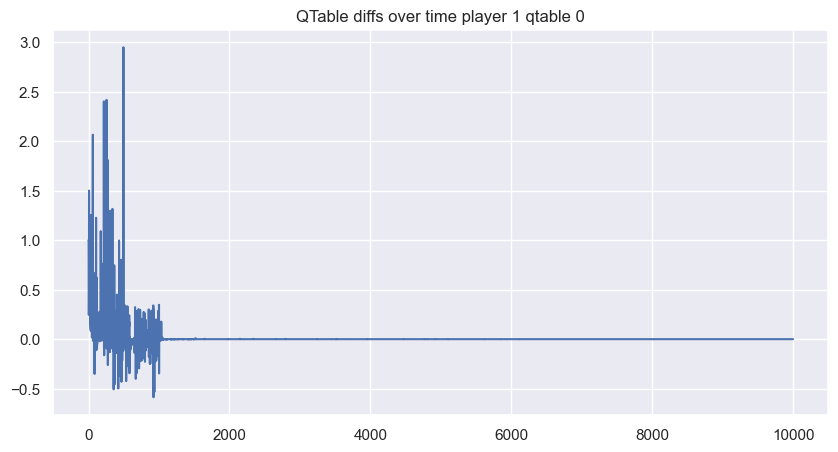

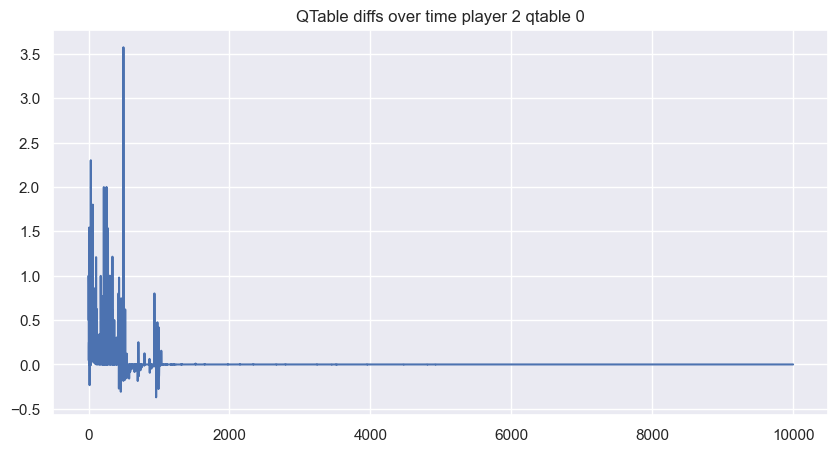

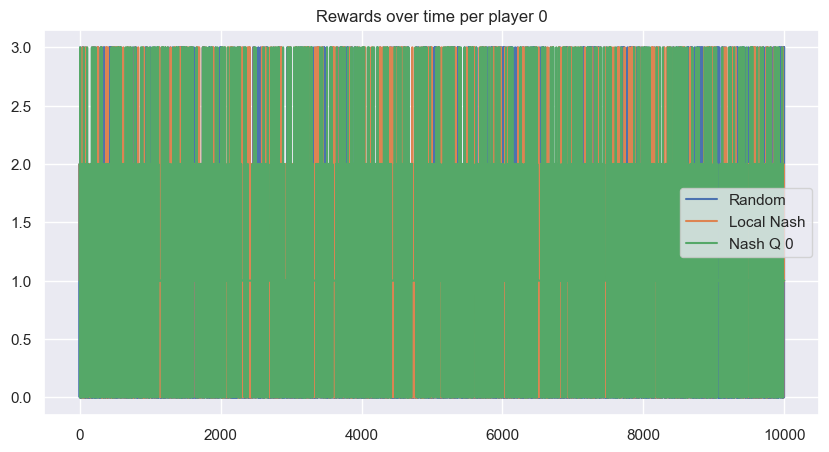

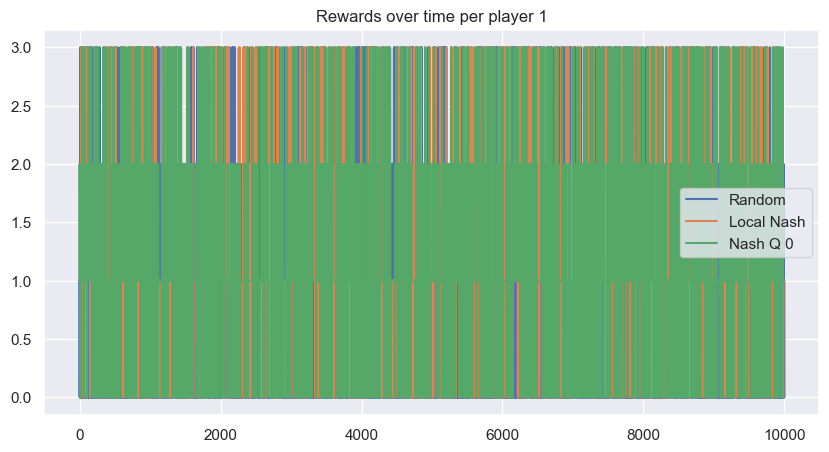

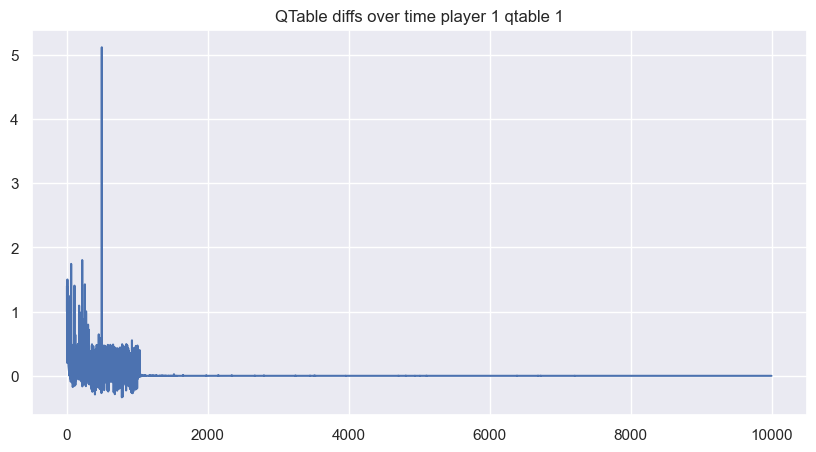

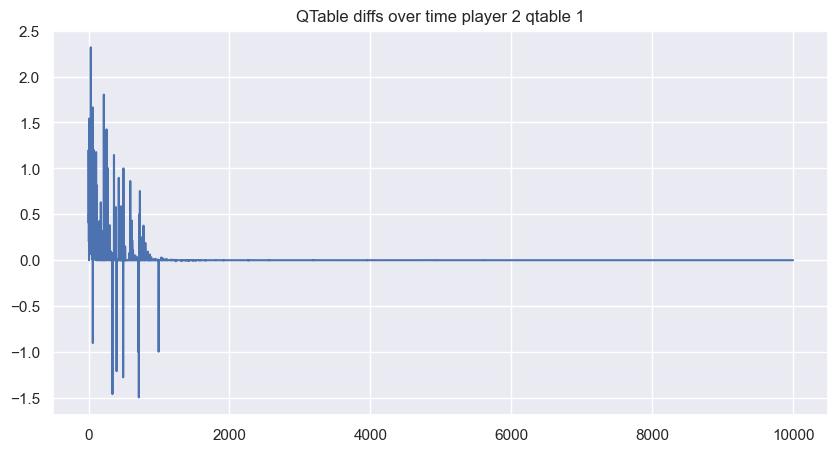

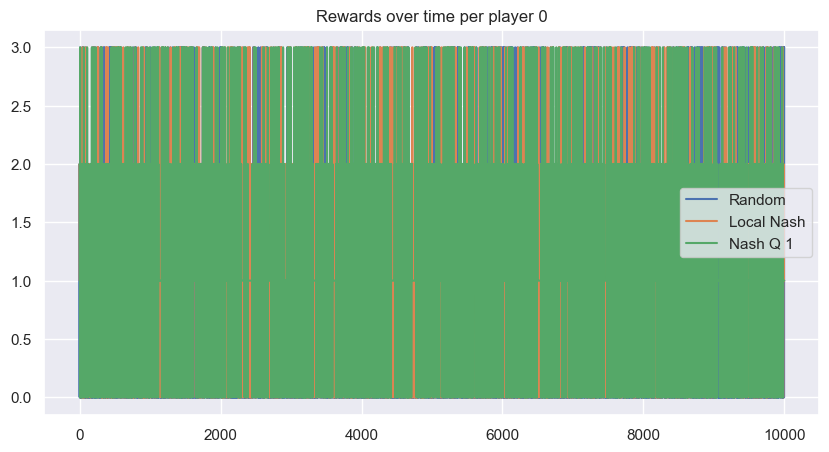

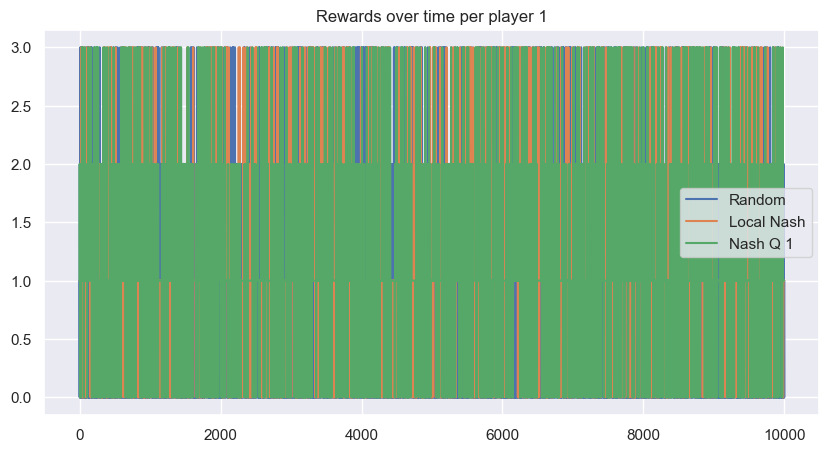

In [29]:
for i in range(N):
    sns.set_theme()

    plt.figure(figsize=(10, 5))
    plt.title("QTable diffs over time player 1 qtable "+ str(i))
    sns.lineplot(data=diffs[i][:, 0])
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title("QTable diffs over time player 2 qtable "+ str(i))
    sns.lineplot(data=diffs[i][:, 1])
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title("Rewards over time per player 0")
    sns.lineplot(data=randomRewards[:, 0], label="Random")
    sns.lineplot(data=localNashRewards[:, 0], label="Local Nash")
    sns.lineplot(data=NashQRewards[i][:, 0], label="Nash Q "+str(i))

    plt.figure(figsize=(10, 5))
    plt.title("Rewards over time per player 1")
    sns.lineplot(data=randomRewards[:, 1], label="Random")
    sns.lineplot(data=localNashRewards[:, 1], label="Local Nash")
    sns.lineplot(data=NashQRewards[i][:, 1], label="Nash Q "+str(i))

    plt.show()

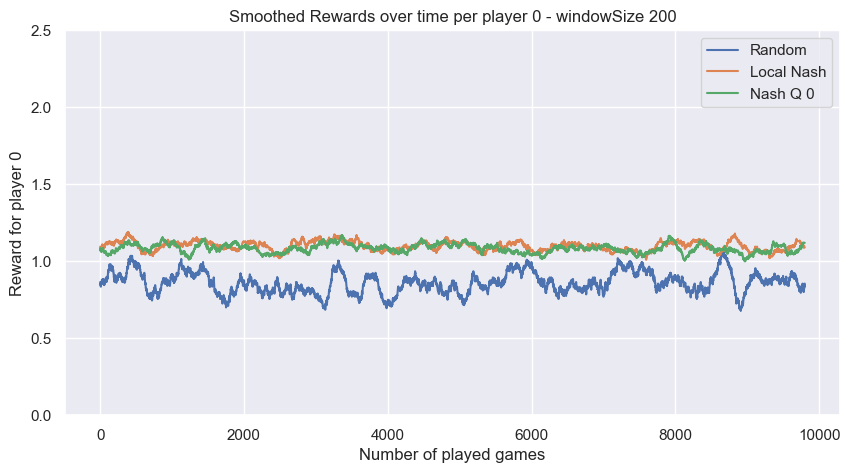

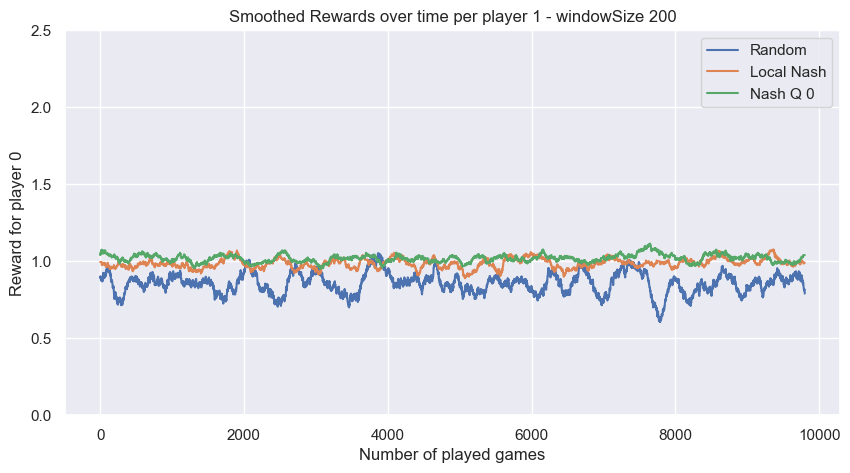

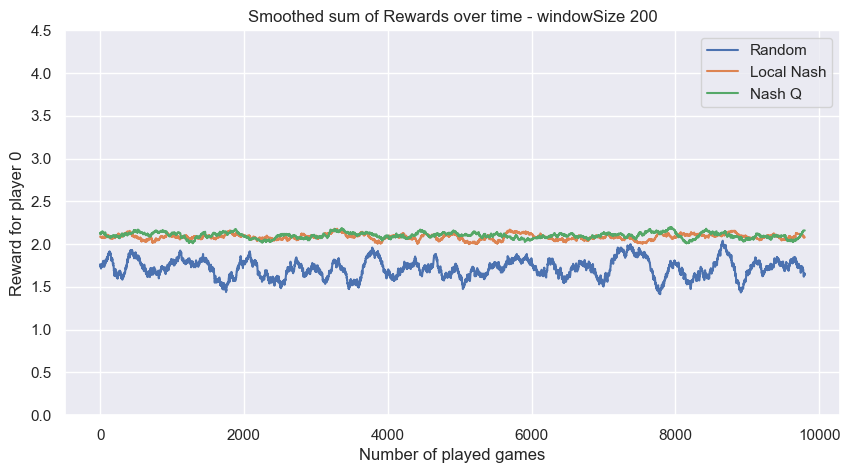

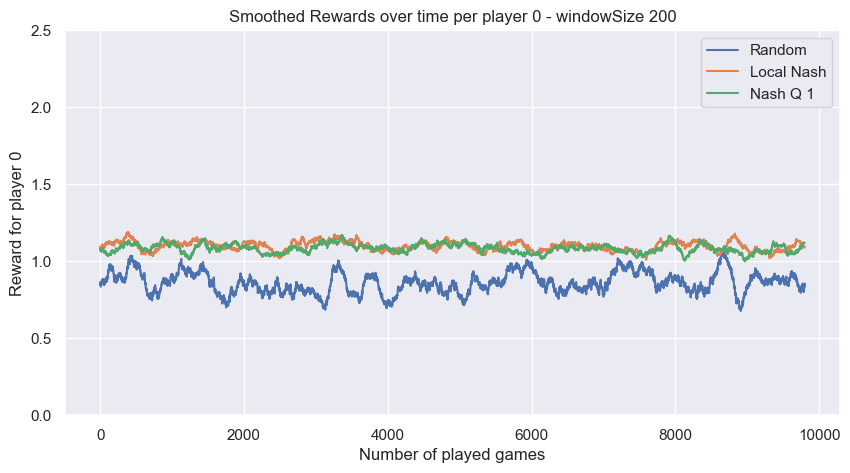

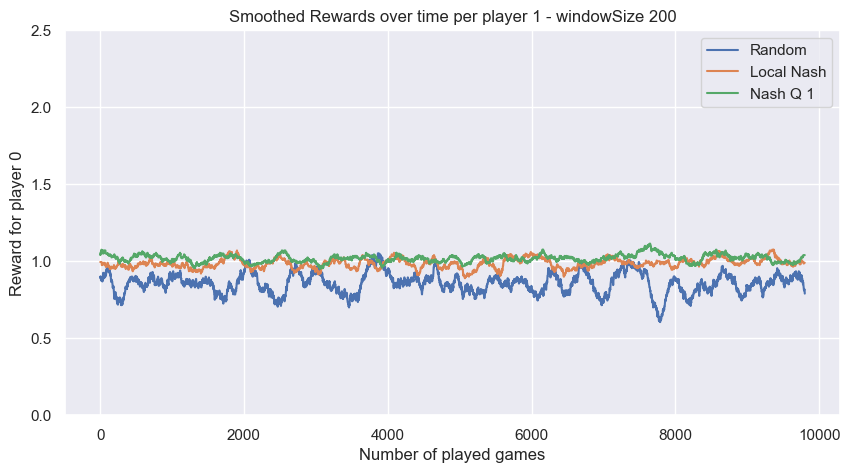

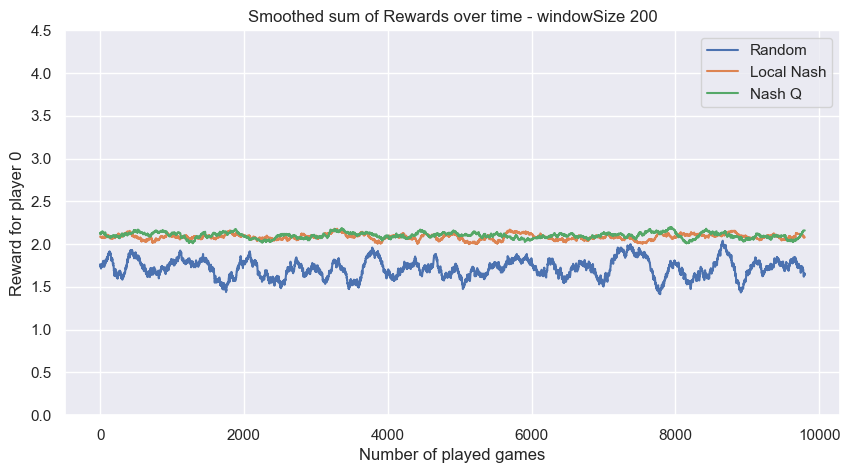

In [30]:
# smooth the data
for i in range(N):
    window = 200
    cumsum = np.cumsum(randomRewards[:, 0])
    cumsum[window:] = cumsum[window:] - cumsum[:-window]
    randomRewardsSmooth_0 = cumsum[window - 1:] / window

    cumsum = np.cumsum(localNashRewards[:, 0])
    cumsum[window:] = cumsum[window:] - cumsum[:-window]
    localNashRewardsSmooth_0 = cumsum[window - 1:] / window

    cumsum = np.cumsum(NashQRewards[i][:, 0])
    cumsum[window:] = cumsum[window:] - cumsum[:-window]
    NashQRewardsSmooth_0 = cumsum[window - 1:] / window

    plt.figure(figsize=(10, 5))
    plt.title(f"Smoothed Rewards over time per player 0 - windowSize {window}")
    sns.lineplot(data=randomRewardsSmooth_0, label="Random")
    sns.lineplot(data=localNashRewardsSmooth_0, label="Local Nash")
    sns.lineplot(data=NashQRewardsSmooth_0, label="Nash Q "+str(i))
    plt.ylim(0, 2.5)
    plt.xlabel("Number of played games")
    plt.ylabel("Reward for player 0")
    plt.show()

    cumsum = np.cumsum(randomRewards[:, 1])
    cumsum[window:] = cumsum[window:] - cumsum[:-window]
    randomRewardsSmooth_1 = cumsum[window - 1:] / window

    cumsum = np.cumsum(localNashRewards[:, 1])
    cumsum[window:] = cumsum[window:] - cumsum[:-window]
    localNashRewardsSmooth_1 = cumsum[window - 1:] / window

    cumsum = np.cumsum(NashQRewards[i][:, 1])
    cumsum[window:] = cumsum[window:] - cumsum[:-window]
    NashQRewardsSmooth_1 = cumsum[window - 1:] / window


    plt.figure(figsize=(10, 5))
    plt.title(f"Smoothed Rewards over time per player 1 - windowSize {window}")
    sns.lineplot(data=randomRewardsSmooth_1, label="Random")
    sns.lineplot(data=localNashRewardsSmooth_1, label="Local Nash")
    sns.lineplot(data=NashQRewardsSmooth_1, label="Nash Q "+str(i))
    plt.ylim(0, 2.5)
    plt.xlabel("Number of played games")
    plt.ylabel("Reward for player 0")
    plt.show()

    randomRewardsSmooth_sum = randomRewardsSmooth_0 + randomRewardsSmooth_1
    localNashRewardsSmooth_sum = localNashRewardsSmooth_0 + localNashRewardsSmooth_1
    NashQRewardsSmooth_sum = NashQRewardsSmooth_0 + NashQRewardsSmooth_1

    plt.figure(figsize=(10, 5))
    plt.title(f"Smoothed sum of Rewards over time - windowSize {window}")
    sns.lineplot(data=randomRewardsSmooth_sum, label="Random")
    sns.lineplot(data=localNashRewardsSmooth_sum, label="Local Nash")
    sns.lineplot(data=NashQRewardsSmooth_sum, label="Nash Q")
    plt.ylim(0, 4.5)
    plt.xlabel("Number of played games")
    plt.ylabel("Reward for player 0")
    plt.show()



why are the two qTables different??
In my opinion this is related to the computation of Nash Equilibria, which probably are NOT returned always in the same order (otherwise why)???

In [46]:
#here I show that there are no differences between the rewards obtained
for x in (NashQRewards[0]-NashQRewards[1]):
    print(x)
    for n in x:
        assert n == 0



[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0

[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0

In [52]:
# here I show that the Qtables contain different values
for x in (qTables[0]-qTables[1]):
    print(x)


[[[1.40039600e+00 4.32474760e-01]
  [1.19912616e+00 4.95089595e-01]]

 [[1.09846715e+00 5.82938848e-02]
  [2.33381113e-04 9.04904480e-04]]]
[[[-0.48005493  0.18521221]
  [ 6.84673125  4.90232104]]

 [[ 4.9702958   7.27090376]
  [ 2.95968843  3.58931521]]]
[[[-2.70171705e-01  1.86256299e-01]
  [-9.22573840e+00  6.36691851e+00]]

 [[ 8.64207417e-04  9.41028002e-04]
  [-5.14758218e+00 -9.95212212e-01]]]
[[[-0.7466683   0.43454896]
  [-0.5077581  -0.65901053]]

 [[-0.40583664 -2.85999455]
  [-0.40939743 -0.20369209]]]
